# 03. Principal Component Analysis (PCA) | تحليل المكونات الرئيسية (PCA)

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 4, Examples 1-2**: K-Means and Hierarchical Clustering
- ✅ **Understanding of variance**: How data spreads out
- ✅ **Basic linear algebra**: Understanding of transformations

**If you haven't completed these**, you might struggle with:
- Understanding how PCA reduces dimensions
- Knowing when to use PCA vs feature selection
- Understanding explained variance and how to choose components

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 4, Example 3** - it's about **dimensionality reduction**, NOT clustering!

**⚠️ Important Clarification**: PCA is **dimensionality reduction**, not clustering:
- **Clustering** (Examples 1-2): Groups similar data points together
- **PCA** (Example 3): Reduces number of features while preserving information
- **Different Purpose**: Clustering finds groups, PCA reduces dimensions

**Why this example THIRD in Unit 4?**
- **Before** you can reduce dimensions, you need to understand data structure (from clustering)
- **After** clustering (unsupervised learning), we introduce dimensionality reduction (also unsupervised)
- **Before** you can use PCA, you need to understand variance and high-dimensional data problems
- **Before** you can choose components, you need to understand explained variance

**Builds on**: 
- 📓 Unit 4, Examples 1-2: Clustering (we understand data structure from unsupervised learning)
- 📓 All previous examples (data processing concepts apply)

**Leads to**: 
- 📓 Unit 5: Model Selection (PCA can be used for feature engineering)
- 📓 All ML projects (PCA is used for visualization, compression, and feature engineering!)

**Why this order?**
1. After learning clustering (unsupervised), PCA introduces another unsupervised technique
2. PCA solves **high-dimensional data problems** (too many features to visualize/analyze)
3. PCA teaches **dimensionality reduction** (reducing features while keeping information)
4. PCA shows **explained variance** (how much information each component captures)
5. PCA enables **data visualization** (projecting high-dimensional data to 2D/3D)

---

### 🔗 Transition from Clustering to Dimensionality Reduction | الانتقال من التجميع إلى تقليل الأبعاد

**After Clustering (Examples 1-2):**
- We learned to group similar data points together (K-Means, Hierarchical)
- We understand unsupervised learning (learning patterns without labels)

**New Problem: High-Dimensional Data**
- Many datasets have **many features** (30, 100, 1000+ features)
- **Hard to visualize**: Can't plot 100-dimensional data
- **Hard to analyze**: Too many features make analysis complex
- **Curse of dimensionality**: High-dimensional data is sparse and hard to work with

**PCA Solution:**
- Reduces dimensions (from many features to fewer components)
- Keeps most important information (preserves variance)
- Enables visualization (projects to 2D/3D)
- Removes noise (less important dimensions)

---

## The Story: Finding the Most Important Directions | القصة: إيجاد أهم الاتجاهات

Imagine you're taking a photo. **Before** PCA, you capture everything (all dimensions). **After** PCA, you find the best angle that captures the most important information - much more efficient!

Same with machine learning: **Before** PCA, we use all features (many dimensions). **After** PCA, we find the most important directions (principal components) that capture most variance - reduces dimensions while keeping information!

---

## Why PCA Matters | لماذا يهم PCA؟

PCA is essential for dimensionality reduction:
- **Reduces Dimensions**: Compresses data from many features to fewer components
- **Preserves Variance**: Keeps most important information
- **Visualization**: Projects high-dimensional data to 2D/3D for visualization
- **Noise Reduction**: Removes less important dimensions (often noise)
- **Feature Engineering**: Creates new features (principal components) that are linear combinations of original features

## Learning Objectives | أهداف التعلم
1. Perform PCA for dimensionality reduction
2. Understand explained variance and cumulative variance
3. Choose optimal number of components
4. Visualize data in reduced dimensions
5. Interpret principal components (what they represent)
6. Use PCA for data compression and visualization

In [1]:
# Step 1: Import necessary libraries
# These libraries help us perform PCA (dimensionality reduction)

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.decomposition import PCA  # Principal Component Analysis
from sklearn.preprocessing import StandardScaler  # CRITICAL for PCA! Must scale features
from sklearn.datasets import load_iris  # Sample dataset (Iris flowers)

print("✅ Libraries imported successfully!")
print("\n📚 Key PCA Concepts:")
print("   - PCA: Finds directions (principal components) of maximum variance")
print("   - Principal Components: New features that are linear combinations of original features")
print("   - Explained Variance: How much variance each component captures")
print("   - Dimensionality Reduction: Reduces number of features while keeping information")
print("   - 95% Rule: Often keep components that explain 95% of variance")
print("\n   ⚠️  IMPORTANT: PCA requires feature scaling! Always use StandardScaler!")

✅ Libraries imported successfully!

📚 Key PCA Concepts:
   - PCA: Finds directions (principal components) of maximum variance
   - Principal Components: New features that are linear combinations of original features
   - Explained Variance: How much variance each component captures
   - Dimensionality Reduction: Reduces number of features while keeping information
   - 95% Rule: Often keep components that explain 95% of variance

   ⚠️  IMPORTANT: PCA requires feature scaling! Always use StandardScaler!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We have high-dimensional data (many features) that's hard to visualize and may have redundant information.

**AFTER**: We'll use PCA to reduce dimensions while keeping the most important information!

**Why this matters**: High-dimensional data is hard to work with. PCA reduces dimensions while preserving variance - makes data easier to visualize and analyze!

**Common Student Questions:**
- **Q: Why use PCA instead of just removing features?**
  - Answer: PCA creates new features (principal components) that capture information from ALL original features
  - Removing features = losing information, PCA = keeping information in fewer dimensions
  - Example: 100 features → PCA → 10 components (keeps 95% of variance) vs removing 90 features (loses information)
- **Q: Why does PCA need scaling?**
  - Answer: PCA finds directions of maximum variance → scaling matters!
  - Problem: Features on different scales (age: 20-60, salary: 30k-100k) → variance dominated by salary
  - Solution: StandardScaler puts all features on same scale → fair variance calculation
- **Q: How many components should I keep?**
  - Answer: Use explained variance (often keep components that explain 95% of variance)
  - Rule of thumb: Keep components until cumulative variance ≥ 0.95 (95% rule)
  - Or: Keep first 2-3 components for visualization
  - Or: Use elbow method (similar to K-Means) - look for where explained variance drops
- **Q: What do principal components actually mean?**
  - Answer: Principal components are linear combinations of original features
  - PC1 = direction of maximum variance (most important direction)
  - PC2 = second most important direction (orthogonal to PC1)
  - Hard to interpret directly, but useful for dimensionality reduction
- **Q: When should I use PCA?**
  - Answer: Use PCA when:
  - You have many features (100+) and want to reduce dimensions
  - You want to visualize high-dimensional data (2D/3D plots)
  - You want to remove noise (less important components often contain noise)
  - You have multicollinearity (correlated features)
  - Don't use PCA if: You need interpretable features, you have few features (< 10)

In [2]:
# Load Iris dataset
# Iris dataset: 150 samples, 4 features (sepal length, sepal width, petal length, petal width)
# This is a classic dataset perfect for learning PCA!

print("\n1. Loading Iris dataset...")
print("تحميل مجموعة بيانات Iris...")

iris = load_iris()
X = iris.data  # Features (4 dimensions)
y = iris.target  # Target labels (for visualization)
feature_names = iris.feature_names

# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"\n📊 Original Data Shape: {df.shape}")
print(df.head())
print("\n🔍 Notice:")
print("   - 150 samples with 4 features")
print("   - PCA will reduce 4 dimensions to fewer components")
print("   - We'll see how much variance each component captures!")



1. Loading Iris dataset...
تحميل مجموعة بيانات Iris...

📊 Original Data Shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

🔍 Notice:
   - 150 samples with 4 features
   - PCA will reduce 4 dimensions to fewer components
   - We'll see how much variance each component captures!


## Step 1: Load Sample Data | الخطوة 1: تحميل بيانات نموذجية

**BEFORE**: We need to learn PCA, but we need real data to practice on.

**AFTER**: We'll use the famous Iris dataset (4 features) to demonstrate PCA!

**Why Iris dataset?** It's a classic dataset with 4 features - perfect for showing how PCA reduces dimensions!


In [3]:
# Scale features (CRITICAL for PCA!)
# PCA finds directions of maximum variance
# If features have different scales, larger values dominate
# StandardScaler makes all features have mean=0 and std=1

scaler = StandardScaler()
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_scaled = scaler.fit_transform(X)

print("   ✅ Features scaled successfully!")
print("   - All features now have mean=0 and std=1")
print("   - PCA will work correctly on scaled data")


   ✅ Features scaled successfully!
   - All features now have mean=0 and std=1
   - PCA will work correctly on scaled data


## Step 2: Scale Features | الخطوة 2: قياس الميزات

**BEFORE**: Features have different scales (sepal length ~5cm, petal width ~0.2cm).

**AFTER**: We'll scale features so PCA works correctly!

**Why scaling?** PCA is sensitive to feature scales. Without scaling, features with larger values dominate!

In [4]:
# 1. PCA - All Components
print("\n" + "=" * 60)
print("1. PCA - All Components")
print("PCA - جميع المكونات")
print("=" * 60)
pca_full = PCA()
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_pca_full = pca_full.fit_transform(X_scaled)
print(f"\nExplained Variance Ratio:")
print("نسبة التباين الموضحة:")
for i, var_ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"  PC{i+1}: {var_ratio:.4f} ({var_ratio*100:.2f}%)")
print(f"\nCumulative Explained Variance:")
print("التباين التراكمي الموضح:")
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
for i, cum_var in enumerate(cumsum):
    print(f"  PC1-PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Add interpretation after explained variance
print("\n" + "=" * 60)
print("💡 Interpreting Explained Variance | تفسير التباين الموضح")
print("=" * 60)

pc1_var = pca_full.explained_variance_ratio_[0]
pc2_var = pca_full.explained_variance_ratio_[1]
total_2_components = cumsum[1]  # PC1 + PC2

print(f"\n📊 Component Analysis:")
print(f"   - PC1 explains {pc1_var*100:.2f}% of variance (most important!)")
print(f"   - PC2 explains {pc2_var*100:.2f}% of variance")
print(f"   - First 2 components together: {total_2_components*100:.2f}% of variance")

if total_2_components >= 0.95:
    print(f"   - ✅ Excellent! 2 components capture >95% of variance")
    print(f"   - Can reduce 4D → 2D with minimal information loss")
elif total_2_components >= 0.90:
    print(f"   - ✅ Good! 2 components capture >90% of variance")
    print(f"   - Good reduction with acceptable information loss")
else:
    print(f"   - ⚠️  Fair: 2 components capture <90% of variance")
    print(f"   - May need more components to preserve information")

# Find how many components for 95%
n_components_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\n📊 95% Variance Rule:")
print(f"   - Need {n_components_95} components to explain ≥95% variance")
print(f"   - This is a common threshold for dimensionality reduction")
print(f"   - Reduces from {len(pca_full.explained_variance_ratio_)}D → {n_components_95}D")

print(f"\n📚 What This Teaches Us:")
print(f"   - Explained variance shows how much information each component captures")
print(f"   - PC1 always captures the most variance (first principal direction)")
print(f"   - Cumulative variance helps choose number of components")
print(f"   - 95% rule: Keep components that explain ≥95% variance")
print(f"   - More components = more information, but less dimensionality reduction")
print(f"   - Balance between information preservation and dimension reduction")



1. PCA - All Components
PCA - جميع المكونات

Explained Variance Ratio:
نسبة التباين الموضحة:
  PC1: 0.7296 (72.96%)
  PC2: 0.2285 (22.85%)
  PC3: 0.0367 (3.67%)
  PC4: 0.0052 (0.52%)

Cumulative Explained Variance:
التباين التراكمي الموضح:
  PC1-PC1: 0.7296 (72.96%)
  PC1-PC2: 0.9581 (95.81%)
  PC1-PC3: 0.9948 (99.48%)
  PC1-PC4: 1.0000 (100.00%)

💡 Interpreting Explained Variance | تفسير التباين الموضح

📊 Component Analysis:
   - PC1 explains 72.96% of variance (most important!)
   - PC2 explains 22.85% of variance
   - First 2 components together: 95.81% of variance
   - ✅ Excellent! 2 components capture >95% of variance
   - Can reduce 4D → 2D with minimal information loss

📊 95% Variance Rule:
   - Need 2 components to explain ≥95% variance
   - This is a common threshold for dimensionality reduction
   - Reduces from 4D → 2D

📚 What This Teaches Us:
   - Explained variance shows how much information each component captures
   - PC1 always captures the most variance (first princip


2. Visualize Explained Variance
تصور التباين الموضح



✓ Plot saved as 'pca_explained_variance.png'


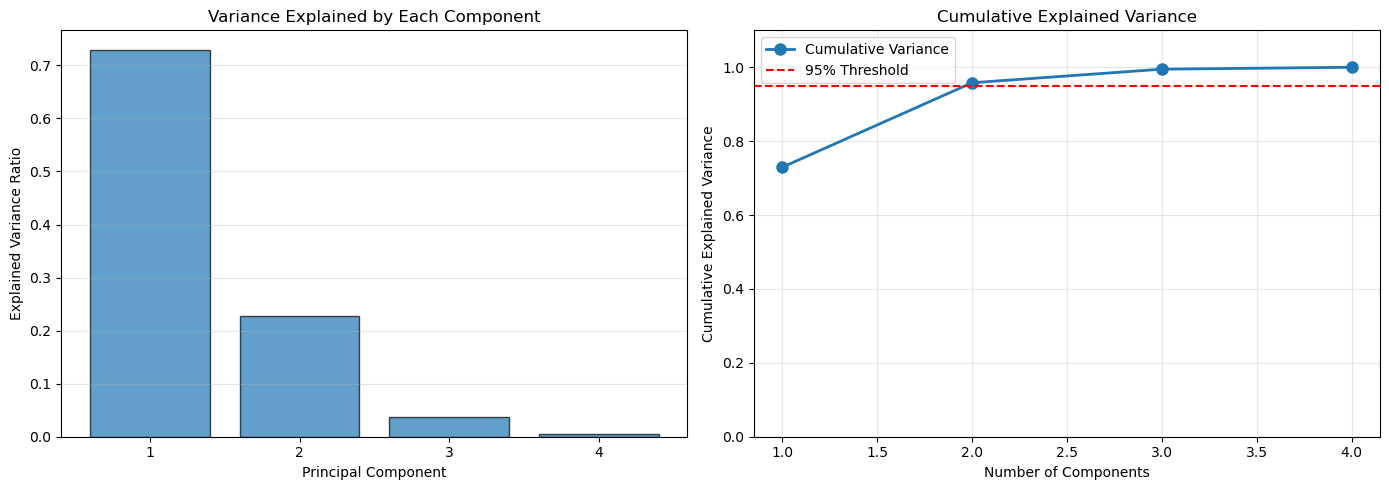


   📊 Visualization created!
   - Bar chart: Variance explained by each component
   - Line chart: Cumulative variance (helps choose number of components)
   - 95% threshold: Common rule - keep components that explain 95% variance


In [5]:
# 2. Visualize Explained Variance
print("\n" + "=" * 60)
print("2. Visualize Explained Variance")
print("تصور التباين الموضح")
print("=" * 60)

# Calculate cumulative explained variance (already calculated in Cell 8)
# cumsum = np.cumsum(pca_full.explained_variance_ratio_)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: Individual explained variance
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
            pca_full.explained_variance_ratio_, 
            alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Variance Explained by Each Component')
axes[0].set_xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
axes[0].grid(True, alpha=0.3, axis='y')

# Line chart: Cumulative explained variance
axes[1].plot(range(1, len(cumsum) + 1), cumsum, 'o-', linewidth=2, markersize=8, label='Cumulative Variance')
axes[1].axhline(0.95, color='r', linestyle='--', label='95% Threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('pca_explained_variance.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'pca_explained_variance.png'")
plt.show()

print("\n   📊 Visualization created!")
print("   - Bar chart: Variance explained by each component")
print("   - Line chart: Cumulative variance (helps choose number of components)")
print("   - 95% threshold: Common rule - keep components that explain 95% variance")


In [6]:
print("\n" + "=" * 60)
print("3. PCA with 2 Components (for visualization)")
print("PCA مع مكونين (للتخيل)")
print("=" * 60)

# Create PCA with 2 components
# n_components=2: Reduce 4 dimensions to 2 dimensions
# This allows us to visualize the data in 2D!
pca_2d = PCA(n_components=2)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_pca_2d = pca_2d.fit_transform(X_scaled)

# Calculate explained variance
pc1_var = pca_2d.explained_variance_ratio_[0]
pc2_var = pca_2d.explained_variance_ratio_[1]
total_var = pc1_var + pc2_var

print(f"\n📊 PCA Results (2 Components):")
print(f"   PC1: {pc1_var:.4f} ({pc1_var*100:.2f}% variance)")
print(f"   PC2: {pc2_var:.4f} ({pc2_var*100:.2f}% variance)")
print(f"   Total: {total_var:.4f} ({total_var*100:.2f}% variance)")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting 2-Component PCA | تفسير PCA بمكونين")
print("=" * 60)

print(f"\n📊 Dimensionality Reduction Summary:")
print(f"   - Original dimensions: 4 features")
print(f"   - Reduced dimensions: 2 components")
print(f"   - Reduction: 50% fewer dimensions (4 → 2)")
print(f"   - Information preserved: {total_var*100:.2f}% of variance")

if total_var >= 0.95:
    print(f"   - ✅ Excellent reduction! >95% variance preserved")
    print(f"   - Can safely use 2D for visualization without losing much information")
elif total_var >= 0.90:
    print(f"   - ✅ Good reduction! >90% variance preserved")
    print(f"   - Acceptable for visualization, some information lost")
else:
    print(f"   - ⚠️  Significant information loss (<90% preserved)")
    print(f"   - May need more components for accurate representation")

print(f"\n📊 Component Importance:")
print(f"   - PC1: {pc1_var*100:.2f}% variance (dominant component)")
print(f"   - PC2: {pc2_var*100:.2f}% variance (secondary component)")
print(f"   - PC1 is {pc1_var/pc2_var:.1f}x more important than PC2")

print(f"\n📚 What This Teaches Us:")
print(f"   - PCA reduces dimensions while preserving most information")
print(f"   - 2 components are perfect for 2D visualization")
print(f"   - Can plot high-dimensional data in 2D/3D for visualization")
print(f"   - Trade-off: Fewer components = less information but simpler visualization")
print(f"   - Use 2-3 components for visualization, more for ML models")

print(f"\n   ✅ Reduced from 4 dimensions to 2 dimensions!")
print(f"   - Kept {total_var*100:.1f}% of original variance")
print(f"   - Can now visualize data in 2D!")
print(f"   - Lost only {100-total_var*100:.1f}% of information")



3. PCA with 2 Components (for visualization)
PCA مع مكونين (للتخيل)

📊 PCA Results (2 Components):
   PC1: 0.7296 (72.96% variance)
   PC2: 0.2285 (22.85% variance)
   Total: 0.9581 (95.81% variance)

💡 Interpreting 2-Component PCA | تفسير PCA بمكونين

📊 Dimensionality Reduction Summary:
   - Original dimensions: 4 features
   - Reduced dimensions: 2 components
   - Reduction: 50% fewer dimensions (4 → 2)
   - Information preserved: 95.81% of variance
   - ✅ Excellent reduction! >95% variance preserved
   - Can safely use 2D for visualization without losing much information

📊 Component Importance:
   - PC1: 72.96% variance (dominant component)
   - PC2: 22.85% variance (secondary component)
   - PC1 is 3.2x more important than PC2

📚 What This Teaches Us:
   - PCA reduces dimensions while preserving most information
   - 2 components are perfect for 2D visualization
   - Can plot high-dimensional data in 2D/3D for visualization
   - Trade-off: Fewer components = less information but 

In [7]:
print("\n" + "=" * 60)
print("5. Principal Components as Linear Combinations")
print("المكونات الرئيسية كتركيبات خطية")
print("=" * 60)

# Principal components are linear combinations of original features
# Each component shows how much each original feature contributes
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

components_df = pd.DataFrame(
    pca_2d.components_.T,  # Transpose to get features as rows
    columns=['PC1', 'PC2'],
    index=feature_names
)

print("\n📊 Principal Components (Feature Contributions):")
print("المكونات الرئيسية (مساهمات الميزات):")
print(components_df.round(4))

print("\n💡 Interpretation:")
print("   - PC1: Weighted combination of all features")
print("   - PC2: Different weighted combination")
print("   - Positive weights: Feature increases component value")
print("   - Negative weights: Feature decreases component value")
print("   - Larger absolute weights: Feature is more important for that component")



5. Principal Components as Linear Combinations
المكونات الرئيسية كتركيبات خطية

📊 Principal Components (Feature Contributions):
المكونات الرئيسية (مساهمات الميزات):
                      PC1     PC2
sepal length (cm)  0.5211  0.3774
sepal width (cm)  -0.2693  0.9233
petal length (cm)  0.5804  0.0245
petal width (cm)   0.5649  0.0669

💡 Interpretation:
   - PC1: Weighted combination of all features
   - PC2: Different weighted combination
   - Positive weights: Feature increases component value
   - Negative weights: Feature decreases component value
   - Larger absolute weights: Feature is more important for that component



✓ Plot saved as 'pca_2d_projection.png'


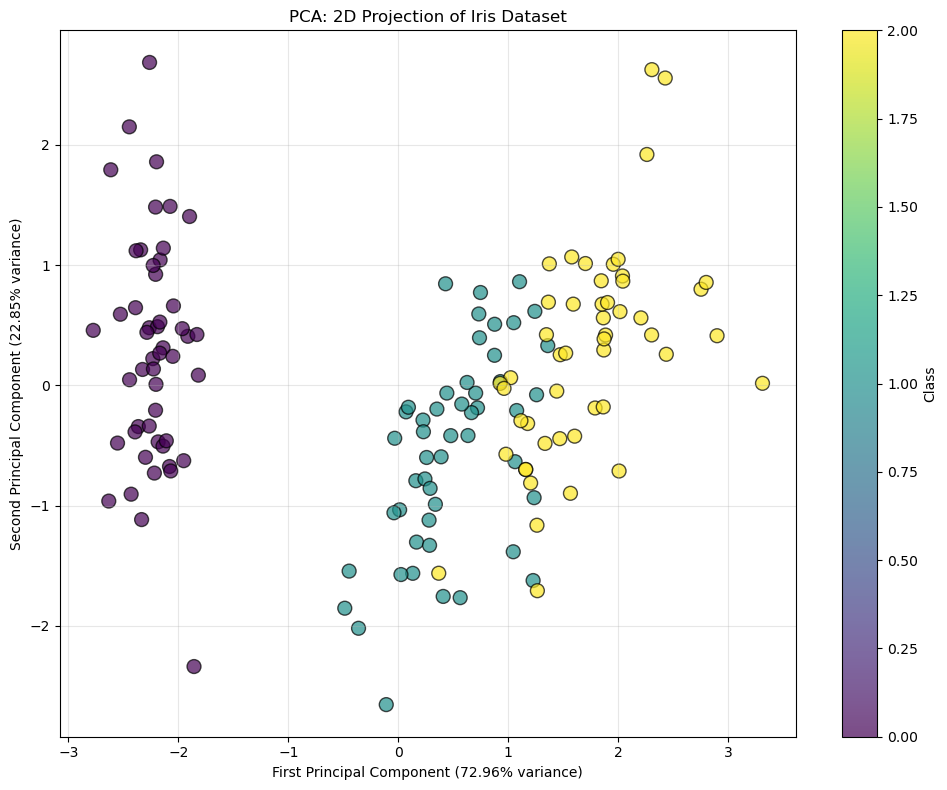


4. Compare Original vs PCA Transformed Data
مقارنة البيانات الأصلية مقابل البيانات المحولة بـ PCA



✓ Plot saved as 'pca_comparison.png'


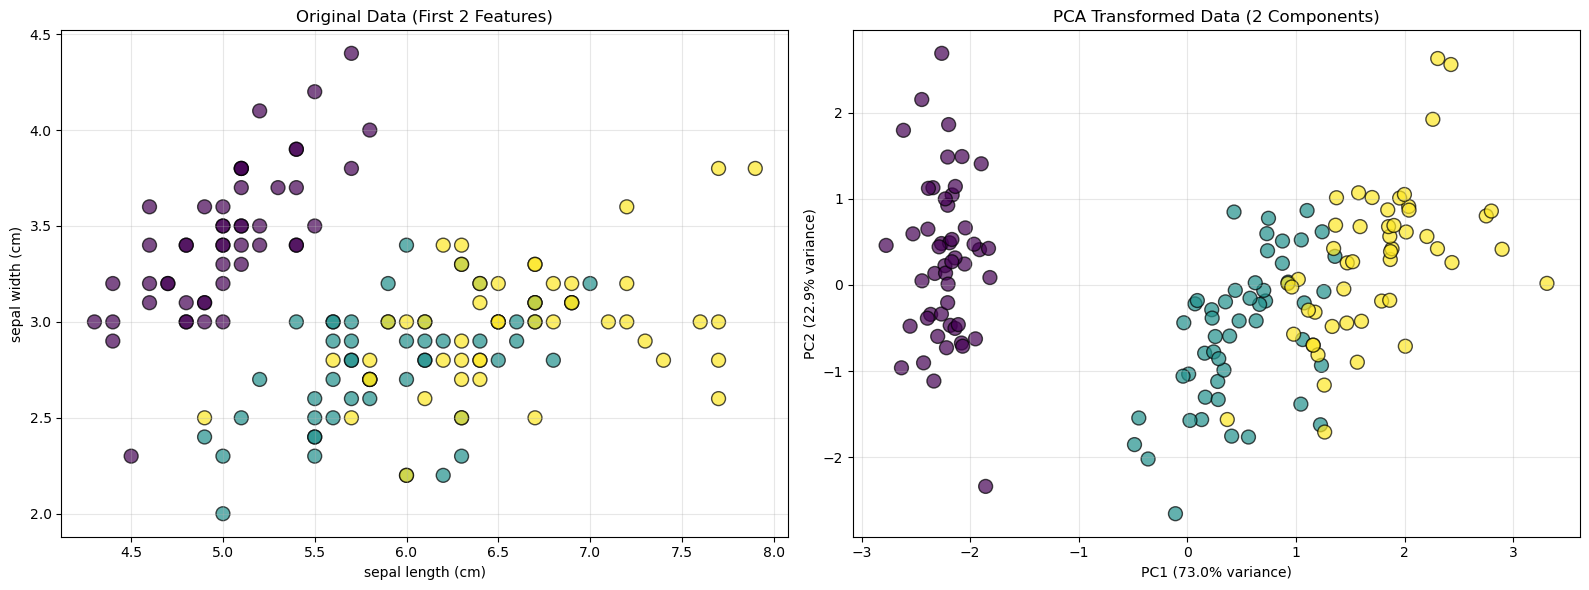

In [8]:
# Visualize 2D projection
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y,
                     cmap='viridis', edgecolors='black', s=100, alpha=0.7)
plt.xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('PCA: 2D Projection of Iris Dataset')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_2d_projection.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'pca_2d_projection.png'")
plt.show()

# 4. Compare Original vs PCA Transformed Data
print("\n" + "=" * 60)
print("4. Compare Original vs PCA Transformed Data")
print("مقارنة البيانات الأصلية مقابل البيانات المحولة بـ PCA")
print("=" * 60)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original data (first 2 features)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
               edgecolors='black', s=100, alpha=0.7)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('Original Data (First 2 Features)')
axes[0].grid(True, alpha=0.3)

# PCA transformed data
scatter = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y,
                         cmap='viridis', edgecolors='black', s=100, alpha=0.7)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[1].set_title('PCA Transformed Data (2 Components)')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'pca_comparison.png'")
plt.show()


## 6. Choosing Optimal Number of Components


In [9]:
print("\n" + "=" * 60)
print("6. Choosing Optimal Number of Components")
print("اختيار العدد الأمثل للمكونات")
print("=" * 60)
n_components_range = range(1, len(feature_names) + 1)
explained_variances = []
cumulative_variances = []
for n in n_components_range:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X_scaled)
    explained_variances.append(pca_temp.explained_variance_ratio_[-1])
    cumulative_variances.append(sum(pca_temp.explained_variance_ratio_))



6. Choosing Optimal Number of Components
اختيار العدد الأمثل للمكونات


In [10]:
# Find number of components for 95% variance
n_components_95 = next((i+1 for i, var in enumerate(cumulative_variances) if var >= 0.95), len(feature_names))
print(f"\nNumber of components for 95% variance: {n_components_95}")



Number of components for 95% variance: 2



✓ Plot saved as 'pca_optimal_components.png'


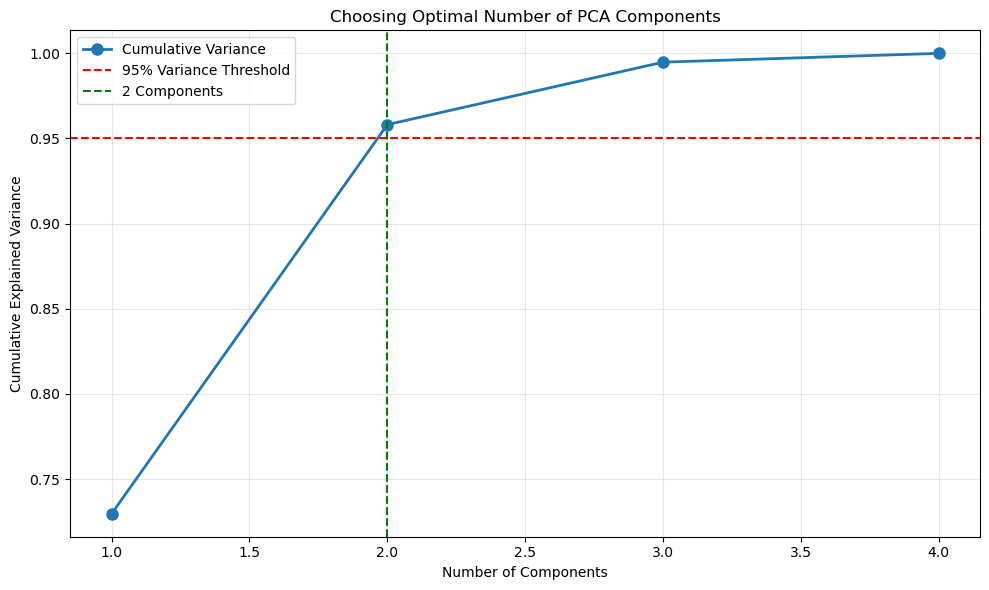

In [11]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, cumulative_variances, 'o-', linewidth=2, markersize=8, label='Cumulative Variance')
plt.axhline(0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(n_components_95, color='g', linestyle='--', label=f'{n_components_95} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing Optimal Number of PCA Components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_optimal_components.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'pca_optimal_components.png'")
plt.show()


In [12]:
# 7. PCA for Data Compression
print("\n" + "=" * 60)
print("7. PCA for Data Compression")
print("PCA لضغط البيانات")
print("=" * 60)
print(f"\nOriginal dimensions: {X_scaled.shape[1]}")
print(f"الأبعاد الأصلية: {X_scaled.shape[1]}")
n_comp = 2
pca_compress = PCA(n_components=n_comp)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_compressed = pca_compress.fit_transform(X_scaled)
X_reconstructed = pca_compress.inverse_transform(X_compressed)
print(f"Compressed dimensions: {X_compressed.shape[1]}")
print(f"الأبعاد المضغوطة: {X_compressed.shape[1]}")
print(f"Compression ratio: {X_compressed.shape[1] / X_scaled.shape[1]:.2%}")
print(f"نسبة الضغط: {X_compressed.shape[1] / X_scaled.shape[1]:.2%}")



7. PCA for Data Compression
PCA لضغط البيانات

Original dimensions: 4
الأبعاد الأصلية: 4
Compressed dimensions: 2
الأبعاد المضغوطة: 2
Compression ratio: 50.00%
نسبة الضغط: 50.00%


## Step 7: Decision Framework - When to Use PCA | الخطوة 7: إطار القرار - متى تستخدم PCA

**BEFORE**: You've learned how to apply PCA, but when should you use it?

**AFTER**: You'll have a clear decision framework to determine if PCA is appropriate for your problem!

**Why this matters**: Using PCA when it's not appropriate can:
- **Lose important information** → PCA may remove features you need
- **Waste computation** → Using PCA when not needed
- **Poor results** → Wrong application leads to worse performance

---

### 🎯 Decision Framework: Is PCA Appropriate? | إطار القرار: هل PCA مناسب؟

**Key Question**: Should I use **PCA** for dimensionality reduction?

#### Decision Tree:

```
What problem are you trying to solve?
├─ DIMENSIONALITY REDUCTION → Check data characteristics
│   ├─ Many features (>50)? → Use PCA ✅
│   │   └─ Why? PCA reduces dimensions efficiently
│   │
│   ├─ Multicollinearity (correlated features)? → Use PCA ✅
│   │   └─ Why? PCA removes correlations
│   │
│   ├─ Need to visualize high-dimensional data? → Use PCA ✅
│   │   └─ Why? PCA reduces to 2-3 dimensions for visualization
│   │
│   └─ Need to speed up algorithms? → Use PCA ✅
│       └─ Why? Fewer features = faster training
│
├─ FEATURE SELECTION → Use OTHER METHODS ❌
│   └─ Why? PCA creates new features, doesn't select existing ones
│
└─ INTERPRETABILITY → Use OTHER METHODS ⚠️
    └─ Why? PCA components are hard to interpret
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Dimensionality reduction → Continue to Step 2
├─ Feature selection → ❌ Use feature selection methods (not PCA)
└─ Interpretability → ⚠️ PCA may not be appropriate

Step 2: Number of Features
├─ Many features (>50) → ✅ PCA APPROPRIATE
│   └─ Why? PCA is efficient for high-dimensional data
│
├─ Medium features (10-50) → Continue to Step 3
└─ Few features (<10) → ⚠️ MAY NOT BE NEEDED
    └─ Why? May not need dimensionality reduction

Step 3: Data Characteristics
├─ Multicollinearity present? → ✅ PCA APPROPRIATE
│   └─ Why? PCA removes correlations
│
├─ Need visualization? → ✅ PCA APPROPRIATE
│   └─ Why? Can reduce to 2-3 dimensions
│
├─ Need speed improvement? → ✅ PCA APPROPRIATE
│   └─ Why? Fewer features = faster algorithms
│
└─ Need interpretable features? → ⚠️ MAY NOT BE APPROPRIATE
    └─ Why? PCA components are hard to interpret
```

---

### 📊 Comparison Table: PCA vs Alternatives | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **PCA** | Dimensionality reduction, multicollinearity, visualization | • Reduces dimensions<br>• Removes correlations<br>• Preserves variance<br>• Good for visualization | • Hard to interpret<br>• Creates new features<br>• May lose information | High-dimensional data, visualization |
| **Feature Selection** | Need interpretable features, want to keep original features | • Interpretable<br>• Keeps original features<br>• Simple | • Doesn't reduce as much<br>• May keep correlations | Need to know which features matter |
| **t-SNE** | Visualization, non-linear patterns | • Great for visualization<br>• Handles non-linear | • Only for visualization<br>• Computationally expensive | Visualizing complex patterns |
| **Autoencoders** | Non-linear dimensionality reduction | • Handles non-linear<br>• Powerful | • Complex<br>• Requires deep learning | Complex non-linear patterns |

---

### ✅ When PCA IS Appropriate | متى يكون PCA مناسبًا

**Use PCA when:**

1. **Many Features** ✅
   - More than 50 features
   - High-dimensional data
   - **Example**: Image data (thousands of pixels), text data (thousands of words)

2. **Multicollinearity** ✅
   - Features are highly correlated
   - PCA removes correlations
   - **Example**: House features (size, rooms, area all correlated)

3. **Visualization Needed** ✅
   - Need to visualize high-dimensional data
   - PCA reduces to 2-3 dimensions
   - **Example**: Visualizing customer segments in 2D

4. **Speed Improvement Needed** ✅
   - Algorithms too slow with many features
   - PCA reduces dimensions, speeds up training
   - **Example**: Training on 1000+ features, need faster training

5. **Noise Reduction** ✅
   - Data has noise in many dimensions
   - PCA focuses on main patterns
   - **Example**: Sensor data with noise

6. **Memory Constraints** ✅
   - Limited memory for storing features
   - PCA reduces storage needs
   - **Example**: Large datasets, limited storage

---

### ❌ When PCA IS NOT Appropriate | متى لا يكون PCA مناسبًا

**Don't use PCA when:**

1. **Feature Selection Needed** ❌
   - Need to know which original features matter
   - PCA creates new features, loses original meaning
   - **Use Instead**: Feature selection methods (Lasso, feature importance)

2. **Interpretability Critical** ❌
   - Need to understand what features mean
   - PCA components are hard to interpret
   - **Use Instead**: Feature selection, domain knowledge

3. **Non-Linear Relationships** ❌
   - Data has non-linear patterns
   - PCA assumes linear relationships
   - **Use Instead**: t-SNE, autoencoders, kernel PCA

4. **Categorical Features** ❌
   - Many categorical features
   - PCA works best with numeric data
   - **Use Instead**: One-hot encoding first, or other methods

5. **Few Features** ❌
   - Less than 10 features
   - May not need dimensionality reduction
   - **Use Instead**: Keep original features

6. **Outliers Present** ❌
   - Many outliers in data
   - PCA is sensitive to outliers
   - **Use Instead**: Remove outliers first, or use robust PCA

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Image Classification (1000+ pixels) ✅ APPROPRIATE
- **Problem**: Classify images with 1000+ pixel features
- **Features**: 1000+ (high-dimensional)
- **Need**: Speed up training, reduce noise
- **Decision**: ✅ Use PCA
- **Reasoning**: Many features, need speed, PCA reduces dimensions efficiently

#### Example 2: Customer Segmentation (50 features) ✅ APPROPRIATE
- **Problem**: Segment customers, visualize in 2D
- **Features**: 50 (medium)
- **Need**: Visualization, remove correlations
- **Decision**: ✅ Use PCA
- **Reasoning**: Need visualization, multicollinearity present, PCA reduces to 2D

#### Example 3: Medical Diagnosis (Need interpretability) ❌ NOT APPROPRIATE
- **Problem**: Diagnose disease, need to explain features
- **Features**: 20 (medium)
- **Need**: Interpretability (need to know which symptoms matter)
- **Decision**: ❌ Use Feature Selection, not PCA
- **Reasoning**: Interpretability critical, PCA components hard to interpret

#### Example 4: Text Classification (Non-linear patterns) ⚠️ MAY NOT BE APPROPRIATE
- **Problem**: Classify documents, complex non-linear patterns
- **Features**: 5000+ (high-dimensional)
- **Patterns**: Non-linear
- **Decision**: ⚠️ Try PCA first, but consider autoencoders if non-linear
- **Reasoning**: Many features, but non-linear patterns may need different methods

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Many features → PCA** - Use when you have 50+ features
2. **Visualization → PCA** - Use to reduce to 2-3 dimensions for plotting
3. **Multicollinearity → PCA** - Use when features are correlated
4. **Interpretability → Feature Selection** - Use when you need to understand features
5. **Non-linear → t-SNE/Autoencoders** - Use when patterns are non-linear
6. **Check explained variance** - Keep enough components to explain 80-95% variance
7. **Scale features first** - PCA requires scaled features

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Image data with 10,000 pixel features
- **Features**: 10,000 (very high-dimensional)
- **Need**: Speed up training
- **Decision**: ✅ PCA (many features, need speed)

**Scenario 2**: Customer data with 30 features, need to visualize segments
- **Features**: 30 (medium)
- **Need**: Visualization in 2D
- **Decision**: ✅ PCA (need visualization, reduces to 2D)

**Scenario 3**: Medical data with 15 symptoms, need to explain diagnosis
- **Features**: 15 (few)
- **Need**: Interpretability (which symptoms matter)
- **Decision**: ❌ Feature Selection, not PCA (interpretability critical)

---

**Connection to Next Steps**: 
- 📓 **Example 1: K-Means** - PCA can be used before clustering for better results
- 📓 **Example 2: Hierarchical Clustering** - PCA helps visualize clustering results
- 📓 **All ML Projects** - PCA is a powerful tool for high-dimensional data


In [13]:
# Calculate reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)
print(f"\nReconstruction Error (MSE): {reconstruction_error:.4f}")
print(f"خطأ إعادة البناء (MSE): {reconstruction_error:.4f}")
print("\n" + "=" * 60)
print("Example 3 Complete! ✓")
print("اكتمل المثال 3! ✓")
print("=" * 60)



Reconstruction Error (MSE): 0.0419
خطأ إعادة البناء (MSE): 0.0419

Example 3 Complete! ✓
اكتمل المثال 3! ✓
